# Charts

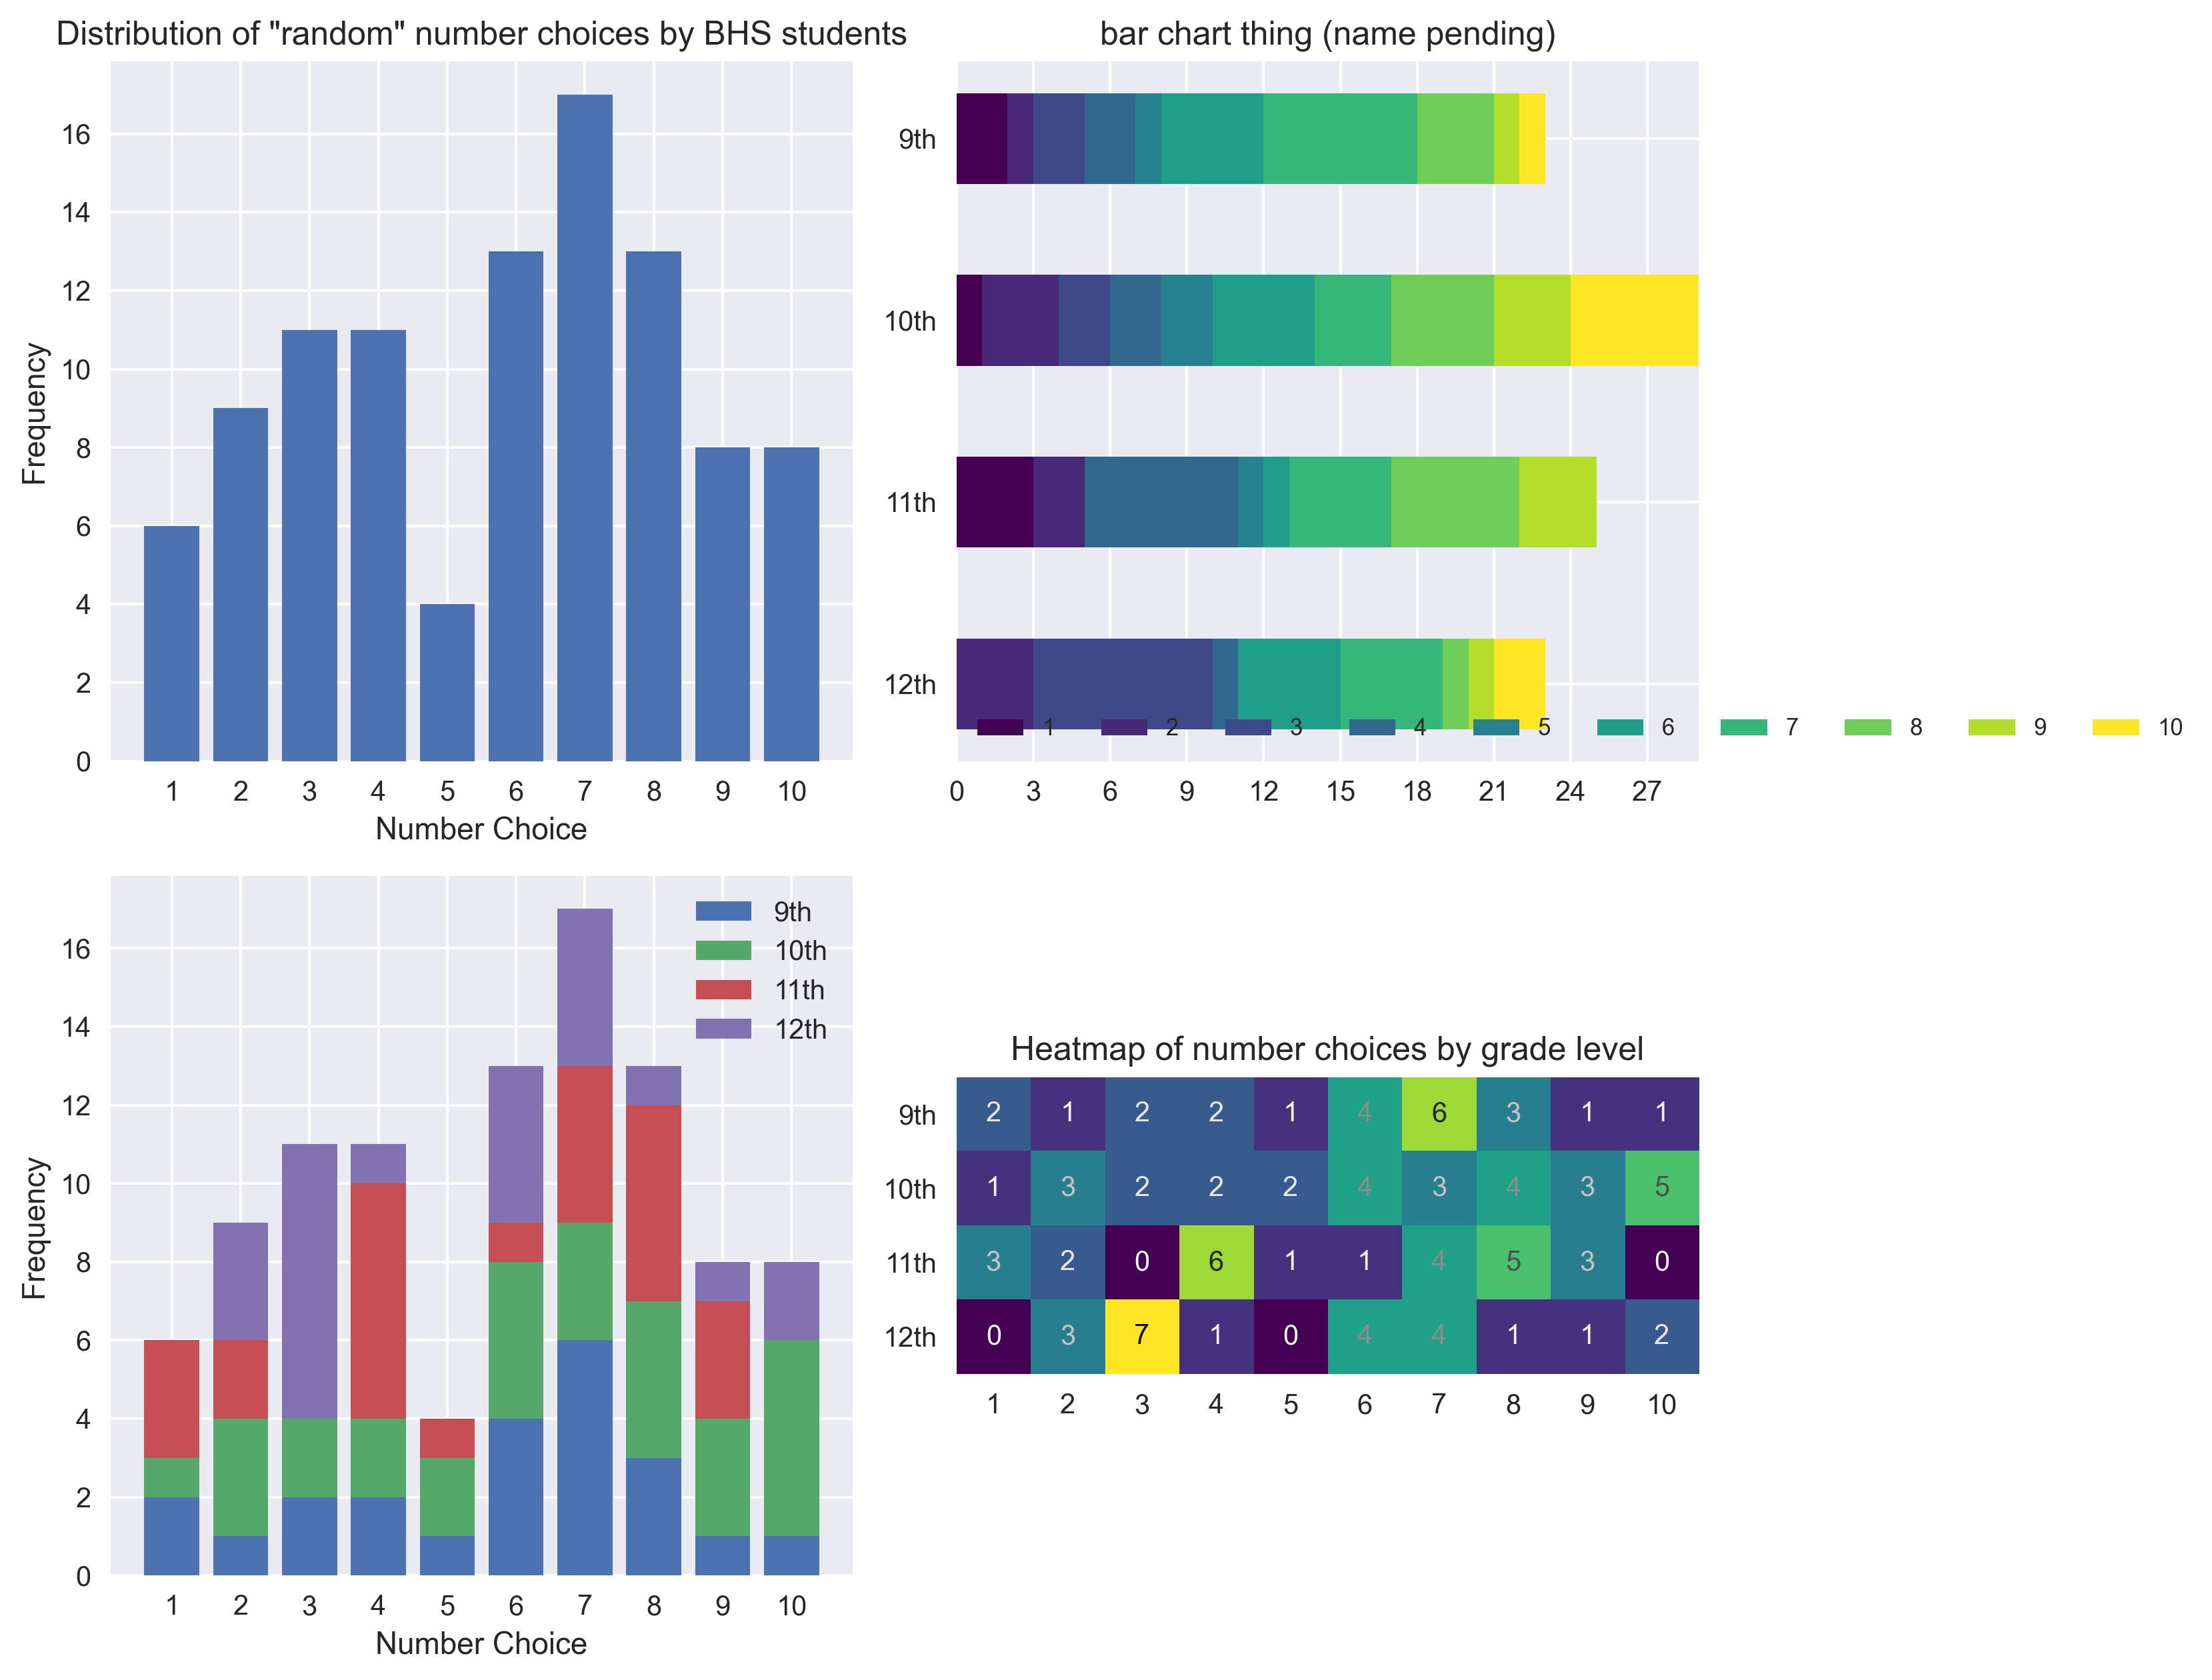

,Timestamp,Email Address,First Name,Last Name,Pick a random number from 1 to 10.,,INDEX,GR LVL
0,5/17/2022 13:14:11,mcculhai000@frogrock.org,Hailey,McCulloch,4,,772,10
1,5/17/2022 13:18:13,siebezoe000@frogrock.org,Zoe,siebert,7,,1095,10
2,5/17/2022 13:19:32,pohllil000@frogrock.org,Lili,Pohl,9,,948,10
3,5/17/2022 13:21:20,whittbri000@frogrock.org,Brighton,Whittlesey,7,,1265,11
4,5/17/2022 13:21:51,wolfcar000@frogrock.org,Cara,Wolf,6,,1291,10
...,...,...,...,...,...,...,...,...
95,5/27/2022 13:58:11,tinkejac000@frogrock.org,Alexandra,Cheng,6,,213,12
96,5/27/2022 14:45:15,tayloemm000@frogrock.org,Emmett,Taylor,2,,1163,10
97,,,Hunter,Whittlesey,9,,1266,10
98,,,Jayden-Andrew,Hwang,8,,563,10


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pandas as pd

plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

import gspread
from oauth2client.service_account import ServiceAccountCredentials

gc = gspread.service_account(filename='credentials.json')
gsheet = gc.open_by_key('1svWmmaMlgArXB-xYvyDbQLzQB7mDYcnbrhIknNa0uaA')

q = 'Pick a random number from 1 to 10.'
data = gsheet.worksheet('responses').get_all_records()
df = pd.DataFrame(data)

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(11, 8.5))

freqs = [df[q].value_counts()[i] for i in range(1, 11)]
ax0.bar(range(1, 11), freqs)
ax0.set_title('Distribution of "random" number choices by BHS students')
ax0.set_xlabel('Number Choice')
ax0.set_ylabel('Frequency')
ax0.set_xticks(range(1, 11))
ax0.set_xticklabels(range(1, 11))

choices = [str(i) for i in range(1, 11)] # TODO: add 'no response' after closing form
results = {
    '9th': [0] * 10,
    '10th': [0] * 10,
    '11th': [0] * 10,
    '12th': [0] * 10
}
for i in range(len(df)):
    if df['GR LVL'][i] == 9:
        results['9th'][df[q][i] - 1] += 1
    elif df['GR LVL'][i] == 10:
        results['10th'][df[q][i] - 1] += 1
    elif df['GR LVL'][i] == 11:
        results['11th'][df[q][i] - 1] += 1
    elif df['GR LVL'][i] == 12:
        results['12th'][df[q][i] - 1] += 1
labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.colormaps['viridis'](np.linspace(0, 1, data.shape[1]))
ax1.set_title('bar chart thing (name pending)') # FIXME: make title not covered by legend
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.invert_yaxis()
# ax1.xaxis.set_visible(False)
ax1.set_xlim(0, np.sum(data, axis=1).max())
for i, (colname, color) in enumerate(zip(choices, category_colors)): # FIXME: fix widths of bars, maybe use rel. freqs (within grade) instead?
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    rects = ax1.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    # ax1.bar_label(rects, label_type = 'center', color=text_color)
    ax1.legend(ncol = len(choices), loc = 'lower left', fontsize = 'small') # , bbox_to_anchor=(0, 1)

ax2.bar(range(1, 11), results['9th'], label='9th')
ax2.bar(range(1, 11), results['10th'], bottom=results['9th'], label='10th')
ax2.bar(range(1, 11), results['11th'], bottom=[results['9th'][i] + results['10th'][i] for i in range(10)], label='11th')
ax2.bar(range(1, 11), results['12th'], bottom=[results['9th'][i] + results['10th'][i] + results['11th'][i] for i in range(10)], label='12th')
ax2.set_xlabel('Number Choice')
ax2.set_xticks(range(1, 11))
ax2.set_xticklabels(range(1, 11))
ax2.set_ylabel('Frequency')
ax2.legend()

hm_data = np.array([results['9th'], results['10th'], results['11th'], results['12th']])
ax3.imshow(hm_data, cmap='viridis', interpolation='none')

ax3.set_xticks(np.arange(10), labels=range(1, 11))
ax3.set_yticks(np.arange(len(results.keys())), labels=results.keys())

# color correction for heatmap labels
# FIXME green
def ccf(x):
    return 1 / (1 + np.exp(x - 4.2))

for i in range(len(results.keys())):
    for j in range(10):
        ax3.text(j, i, hm_data[i, j], va='center', ha='center', color=(ccf(hm_data[i, j]), ccf(hm_data[i, j]), ccf(hm_data[i, j]), 1)) # TODO: maybe find way to change color of text based on value?

ax3.grid(False)
ax3.set_title('Heatmap of number choices by grade level')

# TODO CHARTS MUST BE MODIFIED TO USE VALUES MANUALLY AND AUTOMATICALLY ENTERED IN LOG INSTEAD OF RESPONSES
# ^ maybe not because people have now been manually indexed in responses, we'll see
# ^ yep!
# ^ however, i believe that it may be better to use the dataframes from tests.ipynb to generate the charts just for consistency
fig.tight_layout()
plt.show()
df

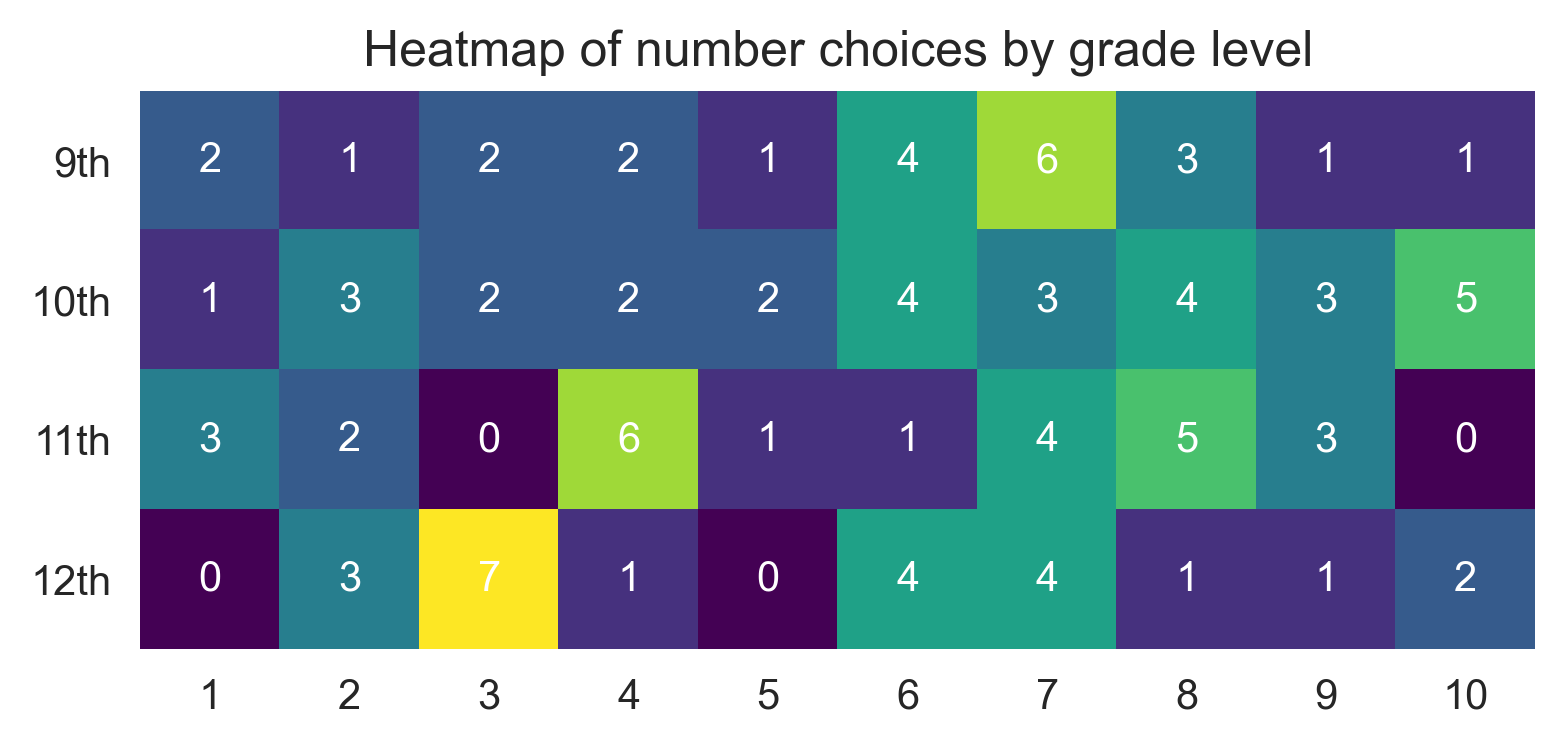

In [11]:
%matplotlib inline

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

fig2, ax0_0 = plt.subplots()
ax0_0.imshow(hm_data, cmap='viridis', interpolation='none')

ax0_0.set_xticks(np.arange(10), labels=range(1, 11))
ax0_0.set_yticks(np.arange(len(results.keys())), labels=results.keys())

for i in range(len(results.keys())):
    for j in range(10):
        ax0_0.text(j, i, hm_data[i, j], va='center', ha='center', color=(1, 1, 1, 1)) # TODO: maybe find way to change color of text based on value?

ax0_0.grid(False)
ax0_0.set_title('Heatmap of number choices by grade level')

plt.show()

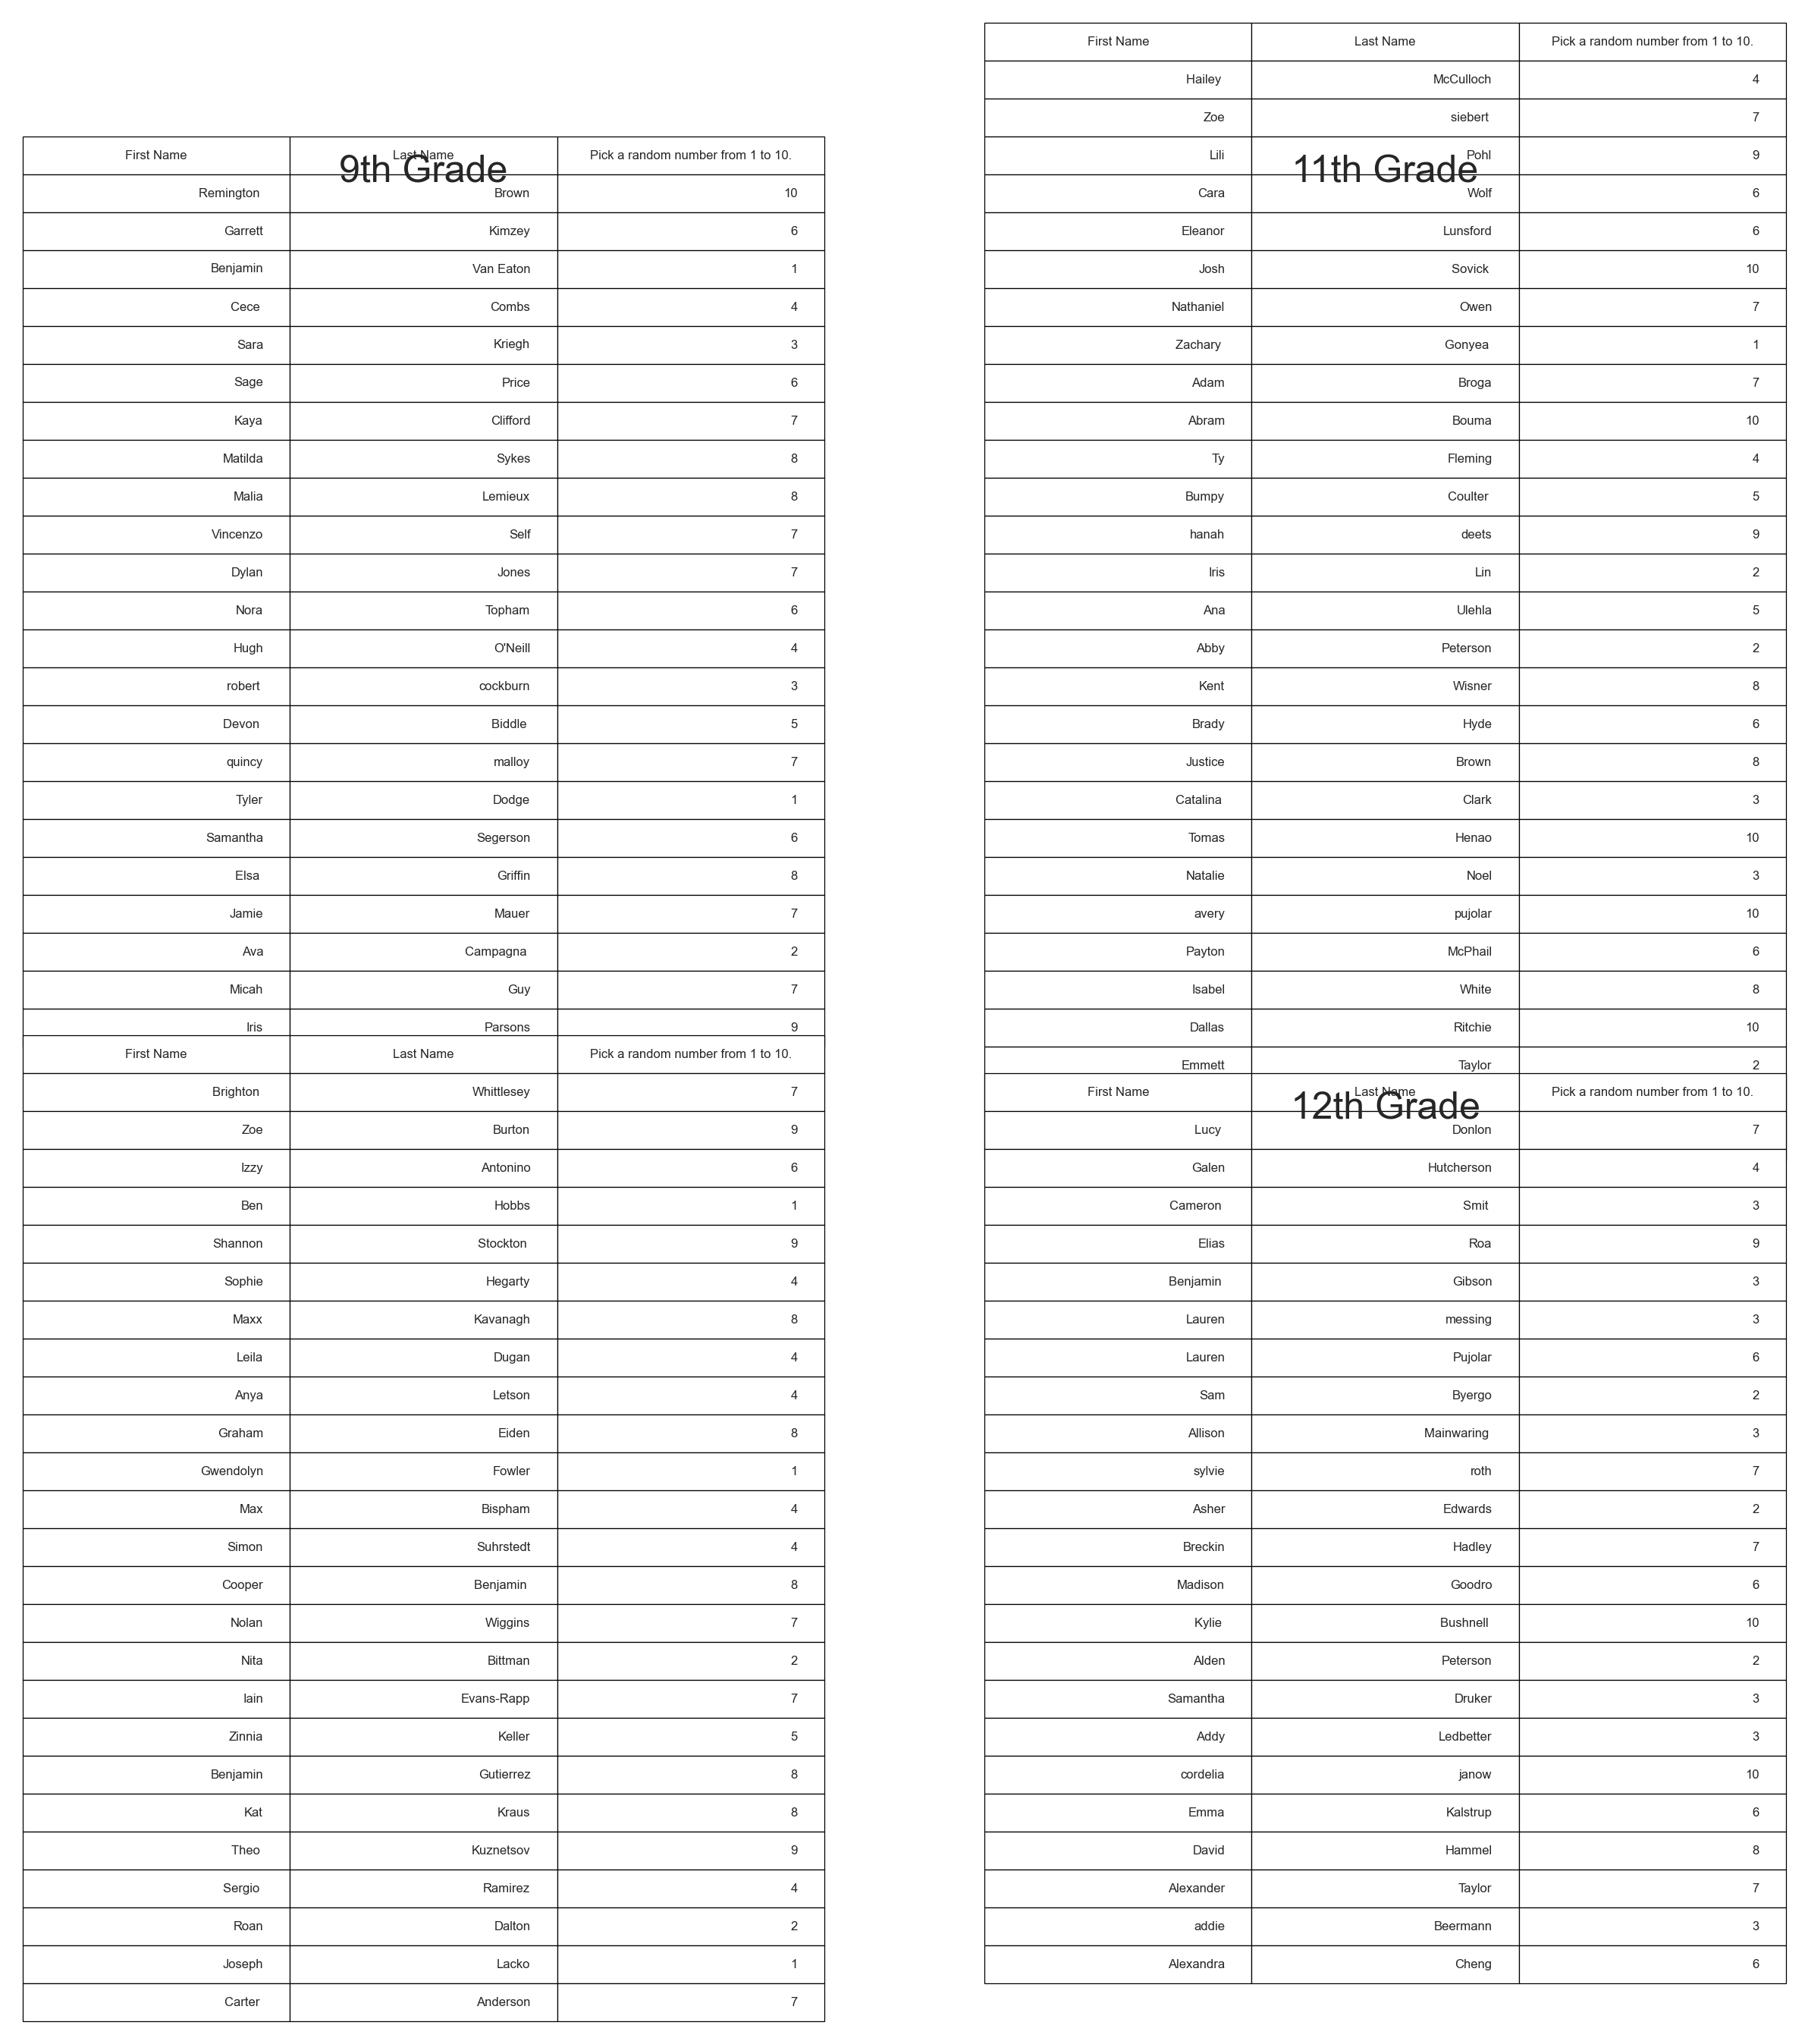

(    First Name  Last Name  Pick a random number from 1 to 10.
 17  Remington       Brown                                  10
 23     Garrett     Kimzey                                   6
 30    Benjamin  Van Eaton                                   1
 35       Cece       Combs                                   4
 38        Sara     Kriegh                                   3
 39        Sage      Price                                   6
 42        Kaya   Clifford                                   7
 45     Matilda      Sykes                                   8
 47       Malia    Lemieux                                   8
 51    Vincenzo       Self                                   7
 57       Dylan      Jones                                   7
 58        Nora     Topham                                   6
 60        Hugh    O'Neill                                   4
 63     robert    cockburn                                   3
 67      Devon     Biddle                              

In [12]:
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# appendix table thing test
df9 = df[df['GR LVL'] == 9]
df10 = df[df['GR LVL'] == 10]
df11 = df[df['GR LVL'] == 11]
df12 = df[df['GR LVL'] == 12]

df9.sort_values(by='INDEX')
df9 = df9.drop(columns=['Timestamp', 'Email Address', 'GR LVL', 'INDEX', ''])

df10.sort_values(by='INDEX')
df10 = df10.drop(columns=['Timestamp', 'Email Address', 'GR LVL', 'INDEX', ''])

df11.sort_values(by='INDEX')
df11 = df11.drop(columns=['Timestamp', 'Email Address', 'GR LVL', 'INDEX', ''])

df12.sort_values(by='INDEX')
df12 = df12.drop(columns=['Timestamp', 'Email Address', 'GR LVL', 'INDEX', ''])

fig3, ((ax1_0, ax1_1), (ax1_2, ax1_3)) = plt.subplots(2, 2, figsize=(10, 10))

ax1_0.set_title('9th Grade')
ax1_0.get_xaxis().set_visible(False)
ax1_0.get_yaxis().set_visible(False)
ax1_0.table(cellText=df9.values, colLabels=df9.columns, loc='center')

ax1_1.set_title('10th Grade')
ax1_1.get_xaxis().set_visible(False)
ax1_1.get_yaxis().set_visible(False)
ax1_1.table(cellText=df10.values, colLabels=df10.columns, loc='center')

ax1_1.set_title('11th Grade')
ax1_2.get_xaxis().set_visible(False)
ax1_2.get_yaxis().set_visible(False)
ax1_2.table(cellText=df11.values, colLabels=df11.columns, loc='center')

ax1_3.set_title('12th Grade')
ax1_3.get_xaxis().set_visible(False)
ax1_3.get_yaxis().set_visible(False)
ax1_3.table(cellText=df12.values, colLabels=df12.columns, loc='center')

fig.tight_layout()
plt.show()
df9, df10, df11, df12 # FIXME titles are wrong?